(-2.0, 2.0)

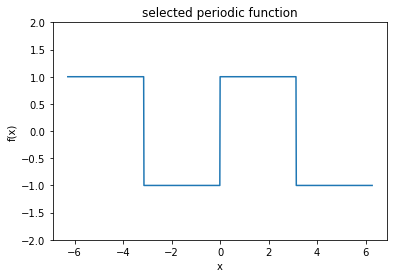

In [1]:
from scipy import fftpack,signal
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# generate input signal
N = 1000
x = np.linspace(-2*np.pi, 2*np.pi, N, endpoint=False)
period = 2 * np.pi
period_count = round((max(x)-min(x))/period)
Input = signal.square(2*np.pi/period * x)

plt.plot(x, Input)
plt.title("selected periodic function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(-2, 2)                   

#plt.show()

In [2]:
# Define fourier series function 
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
#intergation
def f(x,n):
    return  Input[x] * np.cos(2 * np.pi * n * x)

def A0():
    return sum(Input[:int(N/period_count)])/period

def An(n):
    """
    An = np.zeros(n)
    for i in range(1, n+1):
        An[i-1], err = integrate.quad(f, 0, period, args = (i)
    return 2/period* An
    """
    return np.zeros(n)

def Bn(n):
    Bn = []
    for i in range(1,n+1):
        Bn.append(2/(np.pi * i)*(1 - np.cos(i * np.pi)))
    return Bn

print(A0(),An(3)[0],Bn(3))


0.0 0.0 [1.2732395447351628, 0.0, 0.4244131815783876]


Text(0, 0.5, 'f(x)')

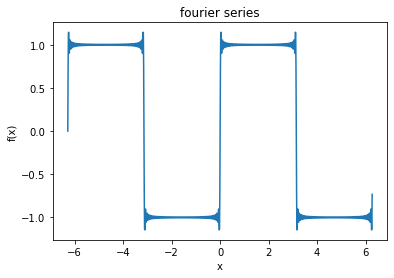

In [3]:
def fourier(x, order, a0, an, bn):
    series = a0
    for n in range(1,order+1):
        #series = series + An(order)[n-1] * np.cos(n * x) + Bn(order)[n-1] * np.sin(n * x)
        series = series + an[n-1] * np.cos(2 * np.pi * n / period * x) + bn[n-1] * np.sin(2 * np.pi * n / period * x)
    #print(A0())    
    #print(An(order))
    #print(Bn(order))
    return series
order = 100
series = fourier(x, order, A0(), An(order), Bn(order))
plt.plot(x, series)
plt.title('fourier series')
plt.xlabel('x')
plt.ylabel('f(x)') 

Text(0, 0.5, 'f(x)')

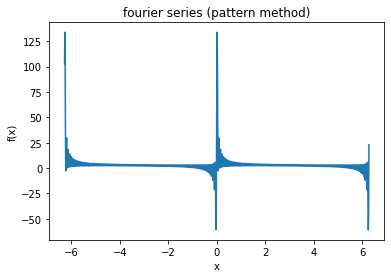

In [8]:
########################(b) pattern learning
# find parameter
def Gradient_descent(Input, learning_rate, order): 
    a0 = 3.14
    an = np.ones(order) 
    bn = np.ones(order)
    series = fourier(x, order, A0(), An(order), Bn(order))
    for step in range(np.size(Input)):
        a0 = a0 + learning_rate * (Input[step] - series[step])*1
    for i in range(1, order + 1): 
        an[i-1] = an[i-1] + learning_rate * (Input[step] - series[step])*np.cos(2 * np.pi/period * i )
        bn[i-1] = bn[i-1] + learning_rate * (Input[step] - series[step])*np.sin(2 * np.pi/period * i )
    return a0, an, bn
a0, an, bn  = Gradient_descent(Input, 0.01, order)
pattern_series = fourier(x, order, a0, an, bn)
plt.plot(x, pattern_series)
plt.title('fourier series (pattern method)')
plt.xlabel('x')
plt.ylabel('f(x)') 

In [2]:
from symfit import parameters, variables, sin, cos, Fit
import numpy as np
import matplotlib.pyplot as plt

x, y = variables('x, y')
w, = parameters('w')
n=3
"""
    Returns a symbolic fourier series of order `n`.

    :param n: Order of the fourier series.
    :param x: Independent variable
    :param f: Frequency of the fourier series
"""
# Make the parameter objects for all the terms
a0, *cos_a = parameters(','.join(['a{}'.format(i) for i in range(0, n + 1)]))
sin_b = parameters(','.join(['b{}'.format(i) for i in range(1, n + 1)]))
# Construct the series
series = a0 + sum(ai * cos(i * w * x) + bi * sin(i * w * x)
                for i, (ai, bi) in enumerate(zip(cos_a, sin_b), start=1))

model_dict = {y: series}

print(model_dict)

{y: a0 + a1*cos(w*x) + a2*cos(2*w*x) + a3*cos(3*w*x) + b1*sin(w*x) + b2*sin(2*w*x) + b3*sin(3*w*x)}


In [3]:
from symfit import parameters, variables, sin, cos, Fit
import numpy as np
import math
import matplotlib.pyplot as plt

def fourier_series(x, f, n=0):
    """
    Returns a symbolic fourier series of order `n`.

    :param n: Order of the fourier series.
    :param x: Independent variable
    :param f: Frequency of the fourier series
    """
    # Make the parameter objects for all the terms
    a0, *cos_a = parameters(','.join(['a{}'.format(i) for i in range(0, n + 1)]))
    sin_b = parameters(','.join(['b{}'.format(i) for i in range(1, n + 1)]))
    # Construct the series
    series = a0 + sum(ai * cos(i * f * x) + bi * sin(i * f * x)
                    for i, (ai, bi) in enumerate(zip(cos_a, sin_b), start=1))
    return series

x, y = variables('x, y')
w, = parameters('w')
model_dict = {y: fourier_series(x, f=w, n=3)}
print(model_dict)

{y: a0 + a1*cos(w*x) + a2*cos(2*w*x) + a3*cos(3*w*x) + b1*sin(w*x) + b2*sin(2*w*x) + b3*sin(3*w*x)}



Parameter Value        Standard Deviation
a0        5.000000e-01 2.075395e-02
a1        5.734902e-12 3.277426e-02
a2        6.124943e-12 3.197889e-02
a3        3.243909e-12 3.080979e-02
b1        6.267589e-01 2.548585e-02
b2        1.986491e-02 2.643438e-02
b3        1.846406e-01 2.756060e-02
w         8.671471e-01 3.356602e-02
Status message         Optimization terminated successfully.
Number of iterations   25
Objective              <symfit.core.objectives.LeastSquares object at 0x7fb61d659510>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fb61d52c310>

Goodness of fit qualifiers:
chi_squared            0.7478591086418305
objective_value        0.37392955432091524
r_squared              0.9401712713086535


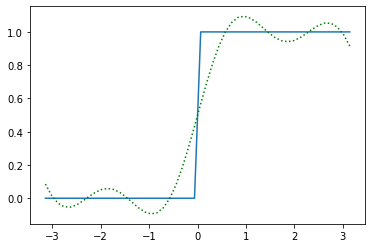

In [2]:
# Make step function data
xdata = np.linspace(-np.pi, np.pi)
ydata = np.zeros_like(xdata)
ydata[xdata > 0] = 1
# Define a Fit object for this model and data
fit = Fit(model_dict, x=xdata, y=ydata)
fit_result = fit.execute()
print(fit_result)

# Plot the result
plt.plot(xdata, ydata)
plt.plot(xdata, fit.model(x=xdata, **fit_result.params).y, color='green', ls=':')